# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

E-news express wants to analyse whether the new landing page is effective enough to gather new subscribers or not. 
Key objectives of the analysis are as follows:
1. To explore the dataset and extract insights
2. Check whether the users spend more time on the new landing page when compared to the old page or not.
3. Check the effectiveness of the new landing page in getting new subscribers.
4. Check whether the converted status depend on the preferred language or not.
5. What is the mean time spent on the new page for different language users.

## Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## 1. Explore the dataset and extract insights using Exploratory Data Analysis. (10 Marks)

### Exploratory Data Analysis - Step by step approach

Typical Data exploration activity consists of the following steps:
1.	Importing Data
2.	Variable Identification
3.  Variable Transformation/Feature Creation
4.  Missing value detection
5.	Univariate Analysis
6.	Bivariate Analysis

### Reading the Data into a DataFrame

In [2]:
# write the code for reading the dataset abtest.csv
data = pd.read_csv('abtest.csv')


### Data Overview
- View a few rows of the data frame.
- Check the shape and data types of the data frame. Add observations.
- Fix the data-types (if needed).
- Missing Value Check.
- Summary statistics from the data frame. Add observations.

In [3]:
data.head() #print first 5 rows of the dataset

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [4]:
data.shape  #print the shape of the dataset

(100, 6)

In [5]:
data.dtypes #get the datatypes of different columns

user_id                     int64
group                      object
landing_page               object
time_spent_on_the_page    float64
converted                  object
language_preferred         object
dtype: object

In [6]:
data.isnull().sum() #check null values in the dataset

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

# Observations
The observations from the above operations are as follows:
1. The dataset has 100 rows and 6 columns
2. There are no null values in the dataset
3. The data types the 6 columns is as follows:
    a. Object: 4 columns
    b. Int: 1 column
    c. Float: 1 column

### Univariate Analysis

In [7]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [8]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()      # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

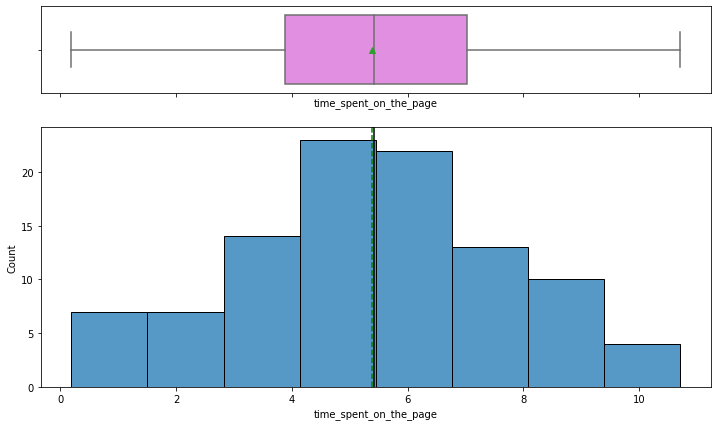

In [9]:
histogram_boxplot(data=data, feature='time_spent_on_the_page', figsize=(12, 7), kde=False, bins=None)

# Observations
1. The time spent on the page is normally distributed.
2. There are no outliers.

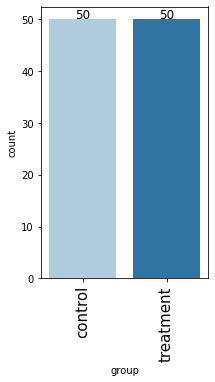

In [10]:
labeled_barplot(data=data, feature='group', perc=False, n=None)

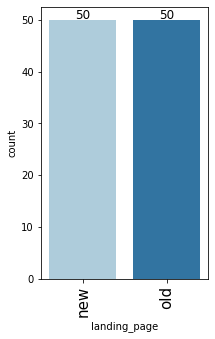

In [11]:
labeled_barplot(data=data, feature='landing_page', perc=False, n=None)

# Observations
1. There are 50 observations each for the old & new page respectively.

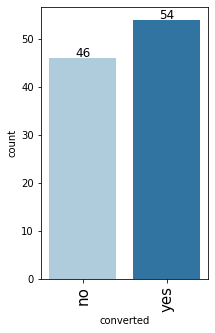

In [12]:
labeled_barplot(data=data, feature='converted', perc=False, n=None)

# Observations
1. Combined conversions from the sample is 54%.

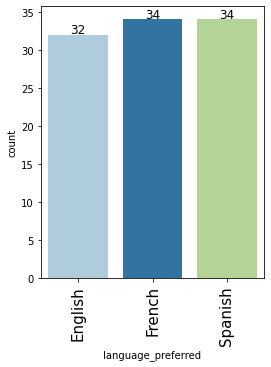

In [13]:
labeled_barplot(data=data, feature='language_preferred', perc=False, n=None)

# Observations
1. The users in the sample combined prefer three languages. The languages and the number are as follow:
    1. English - 32 users
    2. French - 34 users
    3. Spanish - 34 users

### Bivariate Analysis

In [14]:
data.dtypes

user_id                     int64
group                      object
landing_page               object
time_spent_on_the_page    float64
converted                  object
language_preferred         object
dtype: object

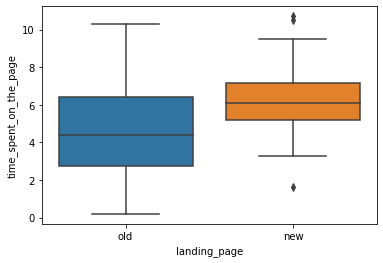

In [15]:
sns.boxplot(data = data, x = 'landing_page', y='time_spent_on_the_page');

# Observations
1. Average time spent on the new page is more.
2. In general, users are more engaged on the new page.
3. There are outliers for the new landing page

<AxesSubplot:xlabel='landing_page', ylabel='count'>

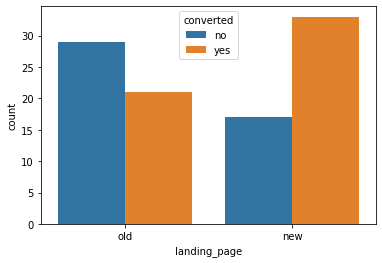

In [16]:
sns.countplot(data = data, x = 'landing_page', hue='converted')

# Observations
1. Number of users converted through the new page is more compared to old page.

<AxesSubplot:xlabel='converted', ylabel='count'>

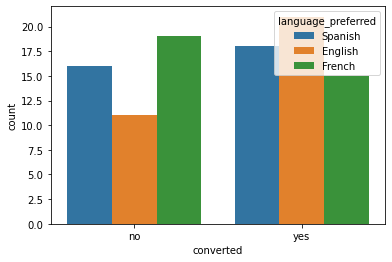

In [17]:
sns.countplot(data = data, x = 'converted', hue='language_preferred')

# Observations
1. Most number of subscriptions are from users whose preferred language is English followed by spanish & french

<AxesSubplot:xlabel='language_preferred', ylabel='time_spent_on_the_page'>

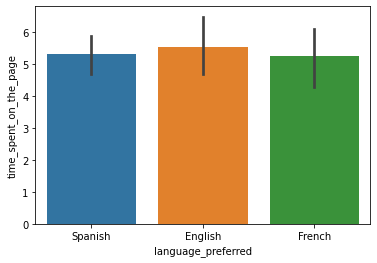

In [18]:
sns.barplot(data = data, y = 'time_spent_on_the_page', x='language_preferred')

# Observations
1. Users with different preferred languages spent more time on the new landing page.

<AxesSubplot:xlabel='converted', ylabel='time_spent_on_the_page'>

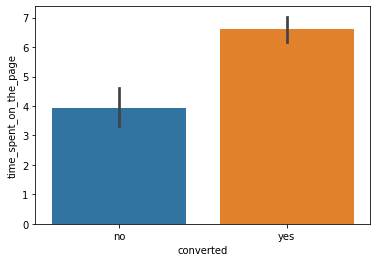

In [19]:
sns.barplot(data = data, y = 'time_spent_on_the_page', x='converted')

# Observations
1. Time spent on the website is directly proportion to the conversions.

## 2. Do the users spend more time on the new landing page than the existing landing page? (10 Marks)

### Perform Visual Analysis

<AxesSubplot:xlabel='landing_page', ylabel='time_spent_on_the_page'>

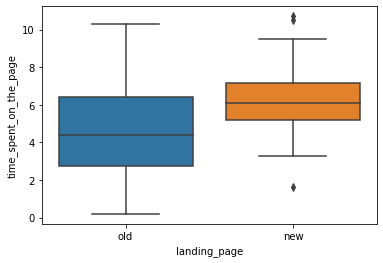

In [20]:
sns.boxplot(data = data, y = 'time_spent_on_the_page', x='landing_page')

# Observations
1. Average time spent on the new landing page is more compared to the old page.

In [21]:
df_old = data[data['landing_page']=='old'] # old page data
df_old=df_old.reset_index(drop=True)
df_new = data[data['landing_page']=='new'] # new page data
df_new=df_new.reset_index(drop=True)

/Users/saibharath/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='time_spent_on_the_page', ylabel='Density'>

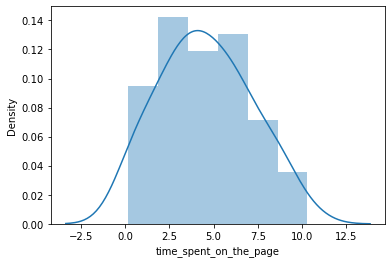

In [22]:
sns.distplot(df_old['time_spent_on_the_page'])

# observation
1. The time spent on the old landing page is normally distributed

/Users/saibharath/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='time_spent_on_the_page', ylabel='Density'>

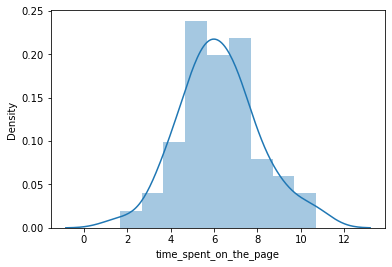

In [23]:
sns.distplot(df_new['time_spent_on_the_page'])

# Observation
1. Time spent by users on the new landing page is normally distributed.

### Step 1: Define the null and alternate hypotheses

In [24]:
mean_old = round(np.mean(df_old['time_spent_on_the_page']),2)
mean_new = round(np.mean(df_new['time_spent_on_the_page']),2)

print('mean time on old page is',mean_old)
print('mean time on new page is',mean_new)

mean time on old page is 4.53
mean time on new page is 6.22


Null Hypothesis: mean time spent on the old page is equal to the mean time spent on the new page.
Alternate Hypothesis: mean time spent on the old page is less than the mean time spent on the new page.

Mean time on old page = 4.53
Mean time on new page = 6.22

### Step 2: Select Appropriate test

Test selected: Two independent sample T-test for equality of means - Equal std. deviation.

Reasons for selecting this test are as follows:
1. The data is continuous > Time is measured on a continous scale.
2. Normally distributed samples > concluded from the graphs above.
3. Equal sample size > concluded from EDA.
4. Random sampling from the population > mentioned in the problem statement.
5. Independent samples > sample is from 100 independent users.

### Step 3: Decide the significance level

Significance level of test is 0.05 (mentioned in the problem statement)

### Step 4: Collect and prepare data

In [25]:
mean_old = round(np.mean(df_old['time_spent_on_the_page']),2)
mean_new = round(np.mean(df_new['time_spent_on_the_page']),2)
std_old = round(df_old['time_spent_on_the_page'].std(),2)
std_new = round(df_new['time_spent_on_the_page'].std(),2)

print('mean time spent on old page is',mean_old)
print('mean time spent on new page is',mean_new)
print('standard deviation on the time spent on old page is',std_old)
print('standard deviation on the time spent on new page is',std_new)

mean time spent on old page is 4.53
mean time spent on new page is 6.22
standard deviation on the time spent on old page is 2.58
standard deviation on the time spent on new page is 1.82


### Step 5: Calculate the p-value

In [26]:
from scipy.stats import ttest_ind

test_stat, p_value = ttest_ind(df_old['time_spent_on_the_page'],df_new['time_spent_on_the_page'], equal_var=True,alternative='greater')
print('The P Value is', p_value)


The P Value is 0.9998683876471904


### Step 6: Compare the p-value with $\alpha$

In [27]:
print('The P Value is', p_value)
print('The value of alpha is ',test_stat)

The P Value is 0.9998683876471904
The value of alpha is  -3.7867702694199856


### Step 7:  Draw inference

# Inferences
1. P value is much more than the significance value to not reject the null hypothesis.
2. 99% of the values lies after the point -3.7868 (Alpha / test statistic)
3. The time that the users spend on the old landing page is similar to the new landing page.

**A similar approach can be followed to answer the other questions.**

## 3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page? (10 Marks)

<AxesSubplot:xlabel='landing_page', ylabel='count'>

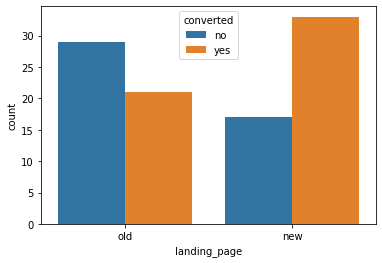

In [28]:
sns.countplot(data=data,x='landing_page',hue='converted')

# Observations
1. Proportion of the users converted is more in the new landing page than the old page.

# Step 1: Define the alternate and null hypothesis

If P_old and P_new are two proportions of the users getting converted after using old and new page respevtively.
The null hypthesis in this case would be P_old = P_new
against the alternate hypothesis P_old < P_new

### Step 2: Select Appropriate test

Test selected: Two proportions z-test

Reasons for selecting this test are as follows:
1. Binomially distributed samples.
2. Normally distributed samples > np & n(1-p), both are greater than 10.
3. Random sampling from the population > mentioned in the problem statement.
4. Independent samples > sample is from 100 independent users.

### Step 3: Decide the significance level

Significance level of test is 0.05 (mentioned in the problem statement)

### Step 4: Collect and prepare data

In [29]:
n_old = 50
temp_old = df_old[df_old['converted']=='yes']
conv_old = temp_old['converted'].count()  # number of conversions from old landing page
n_new = 50
temp_new = df_new[df_new['converted']=='yes']
conv_new = temp_new['converted'].count()  # number of conversions from new landing page

print('total conversions from old landing page are',conv_old)
print('total conversions from new landing page are',conv_new)


total conversions from old landing page are 21
total conversions from new landing page are 33


### Step 5: Calculate the p-value

In [30]:
from statsmodels.stats.proportion import proportions_ztest

conv_count = np.array([21,33])

nr_obs = np.array([50,50])

test_stat, p_value = proportions_ztest(conv_count,nr_obs)
print('the P value is', p_value)

the P value is 0.016052616408112556


### Step 6:  Draw inference

# Inferences
1. P value is less than the significance level. Hence, we can reject the null hypothesis.
2. The user conversion is more with in the users using the new landing page compared to the old page.

In [31]:
data.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


## 4. Is the conversion and preferred language are independent or related? (10 Marks)

<AxesSubplot:xlabel='language_preferred', ylabel='count'>

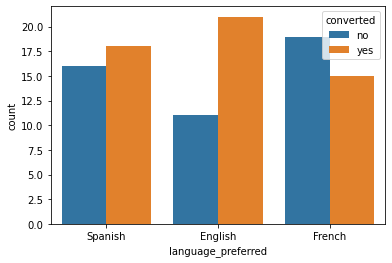

In [32]:
sns.countplot(data=data,x='language_preferred',hue='converted')

# Step 1: Define the alternate and null hypothesis

Null hypthesis: The conversion is independent of preferred language
Alternate hypothesis: The conversion is dependent on preferred languages

### Step 2: Select Appropriate test

Test selected: Chi-square test for independence

Reasons for selecting this test are as follows:
1. Categorical variables > yes.
2. Random sampling from the population > mentioned in the problem statement.
3. Expected number of samples is always more than 5 at each level > from the graph.

### Step 3: Decide the significance level

Significance level of test is 0.05 (mentioned in the problem statement)

### Step 4: Collect and prepare data

In [33]:
data1 = data[['language_preferred','converted']]
Spa = data1[data1['language_preferred']=='Spanish'].value_counts()
Fre = data1[data1['language_preferred']=='French'].value_counts()
Eng = data1[data1['language_preferred']=='English'].value_counts()
print('Conversions for users preferring Spanish', Spa)
print('Conversions for users preferring French', Fre)
print('Conversions for users preferring English', Eng)


Conversions for users preferring Spanish language_preferred  converted
Spanish             yes          18
                    no           16
dtype: int64
Conversions for users preferring French language_preferred  converted
French              no           19
                    yes          15
dtype: int64
Conversions for users preferring English language_preferred  converted
English             yes          21
                    no           11
dtype: int64


In [34]:
dataF = {
    'Yes': [18,19,21],
      'No': [16,15,11]}
df = pd.DataFrame(dataF,index=['Spanish','French','English'])
df

,Yes,No
Spanish,18,16
French,19,15
English,21,11


### Step 5: Calculate the p-value

In [35]:
from scipy.stats import chi2_contingency

chi, p_value, dof, expected = chi2_contingency(df)
p_value

0.5533487201615206

### Step 6:  Draw inference

# Inferences
1. P value is much more than the significance level. Hence, we cannot reject the null hypothesis.
2. The user conversion is independent of the preferred language.

## 5. Is the time spent on the new page same for the different language users? (10 Marks)

<AxesSubplot:xlabel='language_preferred', ylabel='time_spent_on_the_page'>

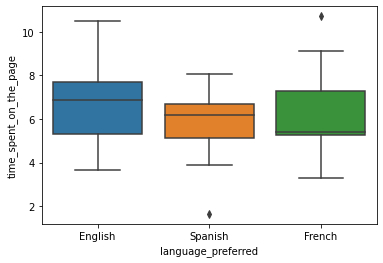

In [36]:
sns.boxplot(data=df_new,x='language_preferred',y='time_spent_on_the_page')

# Observation
1. Users who prefer English spent a bit more time on the new landing page.
2. For the the users preferring Spanish & French, there are outliers in data.
3. Variations is low.

# Step 1: Define the alternate and null hypothesis

Null hypthesis: The average time spent by all the different language users is same

Alternate hypothesis: Time spent by at least one preferred language speaker is different from the remaining.

### Step 2: Select Appropriate test

Test selected: One-way ANOVA F-Test

Reasons for selecting this test are as follows:
1. Sample variances are low >> from the box-plot above.
2. The samples are normally distributed >> from previous graphs.
3. The samples taken are the independent simple random samples >> from the problem statement.

### Step 3: Decide the significance level

Significance level of test is 0.05 (mentioned in the problem statement)

### Step 4: Collect and prepare data

In [37]:
df_new['language_preferred'].value_counts()

Spanish    17
French     17
English    16
Name: language_preferred, dtype: int64

In [38]:
print(df_new.groupby('language_preferred')['time_spent_on_the_page'].mean())

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64


### Step 5: Calculate the p-value

In [39]:
from scipy import stats

w, p_value = stats.shapiro(df_new['time_spent_on_the_page'])
print('The P value is', p_value)

The P value is 0.8040016293525696


### Step 6:  Draw inference

# Inferences
1. P value is much more than the significance level. Hence, we cannot reject the null hypothesis.
2. The time spent on the new page by the users preferring different languages is same.

## Conclusion and Business Recommendations

# Conclusions
1. On an average, users spend more time on the new landing page than the old landing page.
2. Conversion rate of the old landing page is 0.42 and the conversion rate of new landing page is 0.66.
3. Conversion rate doesn't depend on the preferred language.
4. Mean time spent on a new page is same for all the different users

# Business Recommendation
1. New landing page is much more effective to gather new subscribers. We can already start migrating to the new landing page.
2. Time spent on the landing page by the users who prefer spanish is low. Root cause analysis is needed here.
3. Though the conversion rate doesn't depend on the language. We can look at the reason why the conversion rate of the users preferring French is not more.